In [1]:
import plotly.graph_objects as go
import numpy as np

In [57]:
rows, cols = 4, 4

x_target, y_target = np.random.randint(low = 1, high = 5, size = 2)

x = [j + 1 for i in range(rows) for j in range(cols)]
y = [i + 1 for i in range(rows) for j in range(cols)]

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * (rows * cols)
scatter.marker.color = colors
scatter.marker.size = [50] * (rows * cols)
f.layout.hovermode = 'closest'

f.update_layout(
    width=750,  
    height=750,
    xaxis=dict(
        scaleanchor='y',
        scaleratio=1,
        range=[0, cols + 1],
        showticklabels=False,  
        tickvals=[],          
    ),
    yaxis=dict(
        range=[0, rows + 1],
        showticklabels=False,  
        tickvals=[],           
    ),
    plot_bgcolor='white',  
    paper_bgcolor='white'  
)


def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        if x[i] == x_target and y[i] == y_target:  
            c[i] = '#bae2be' 
        else:
            c[i] = '#F08080'  
        s[i] = 50
    with f.batch_update():
        scatter.marker.color = c
        scatter.marker.size = s

scatter.on_click(update_point)

f


FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4],
                         'size': [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
                                  50, 50, 50, 50]},
              'mode': 'markers',
              'type': 'scatter',
              'uid': '4ef3c4dd-a1c1-4a45-a8ef-3f550fb66efa',
              'x': [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4],
              'y': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]}],
    'layout': {'height': 750,
               'hovermode': 'closest',
               'paper_bgcolor': 'white',
               'plot_bgcolor': 'white',
               'template': '...',
               'width': 750,
               'xaxis': {'range': [0, 5], 'scaleanchor': 'y', 'scaleratio': 1, 'showti

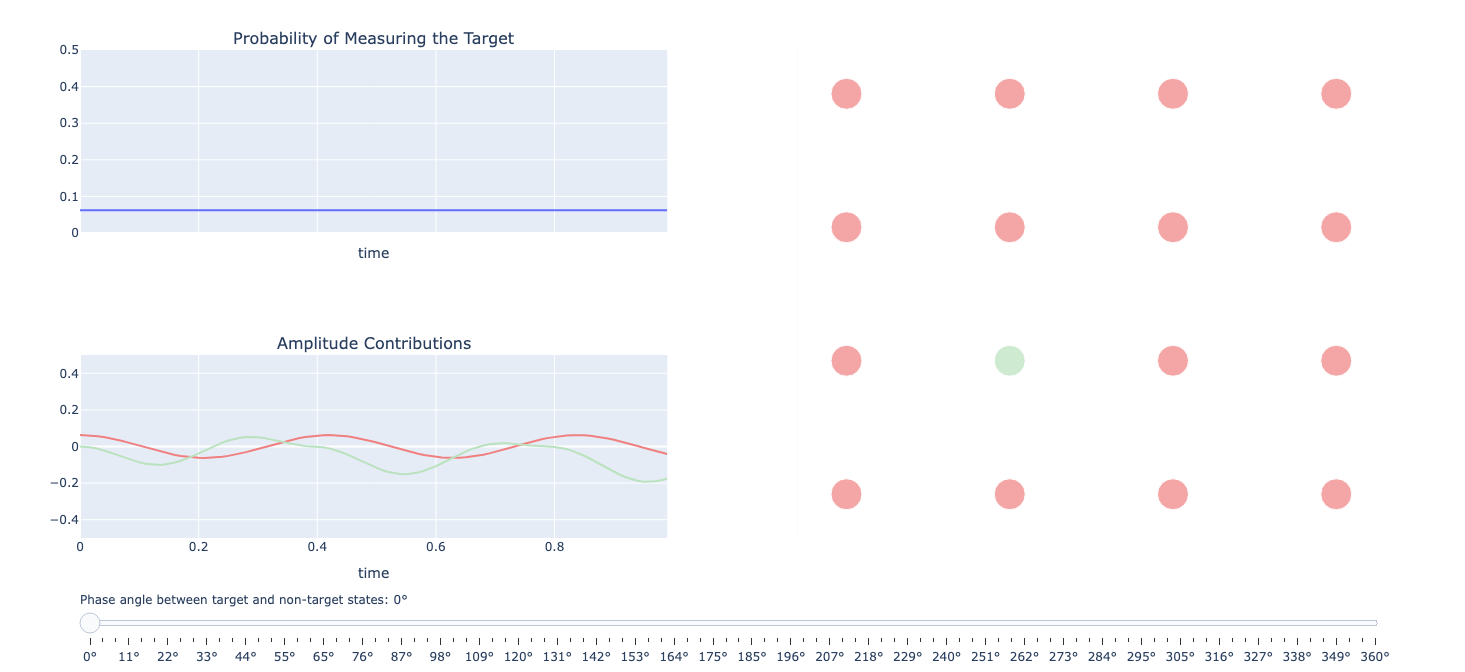

In [104]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy.linalg import expm

def prob(phase, ts, target):
    G = np.ones((16, 16)) - np.eye(16)
    psi = (1/4) * np.ones(16, dtype=np.complex128)
    psi[0] *= np.exp(1j * phase)
    return [np.abs((expm(-1j * t * G) @ psi)[target])**2 for t in ts]

def target_term(phase, t):
    return np.exp(1j * 15 * t)*[(1/4)*np.exp(-1j * phase)]

def non_target_term(phase, t):
    return (1/4) * 15 * np.exp(1j * 15 * t)*(np.exp(-1j * 16 * t) - 1)*(1/(16))*np.exp(-1j * phase)

ts = np.arange(0, 1, 0.01)
phis = np.linspace(0, 2 * np.pi, 100)  # Values of phi for the slider

fig = make_subplots(
    rows=2, cols=2, shared_xaxes='columns',
    subplot_titles=("Probability of Measuring the Target", None, "Amplitude Contributions", None),
    specs=[
        [{"type": "xy"}, {"type": "xy", "rowspan": 2}],  # First row
        [{"type": "xy"}, None]                           # Second row
    ],
)

rows, cols = 4, 4

x = [j + 1 for i in range(rows) for j in range(cols)]
y = [i + 1 for i in range(rows) for j in range(cols)]

# Initial value of phi
phi = np.pi

# Create a list of colors for the markers
colors = ["#F08080"] * 16
colors[5] = "#bae2be"  # Set the 6th marker color (indexing starts at 0)

# Compute initial marker sizes for phi = np.pi
marker_sizes = 16 * [int(500 / 16)]

# Add initial traces with the specified marker colors and sizes
trace1 = go.Scatter(
    x=ts, y=prob(0, ts, 0), name="Probability to Measure the Target"
)
trace2 = go.Scatter(
    x=ts,
    y=np.abs(target_term(0, ts)) * np.real(target_term(0, ts)),
    name="Amplitude from the Target",
    line=dict(color='#F08080')  # Make the line red
)
trace3 = go.Scatter(
    x=ts,
    y=np.abs(non_target_term(0, ts)) * np.imag(non_target_term(0, ts)),
    name="Amplitude From Other States",
    line=dict(color='#bae2be')  # Make the line green
)
trace4 = go.Scatter(
    x=x, y=y, mode='markers',
    marker=dict(size=marker_sizes, color=colors)
)

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)
fig.add_trace(trace3, row=2, col=1)
fig.add_trace(trace4, row=1, col=2)

k = 1
# Create slider steps
steps = []
for phi in phis:
    k += 1

    marker_sizes = np.empty(16, dtype=int)
    marker_sizes[:] = int(500 * prob(phi, [ts[np.argmax(prob(phi, ts, 1))]], 1)[0])
    marker_sizes[5] = int(500 * prob(phi, [ts[np.argmax(prob(phi, ts, 0))]], 0)[0])
    step = dict(
        method="update",
        args=[
            {
                "y": [
                    prob(phi, ts, 0),
                    np.abs(target_term(phi, ts)) * np.real(target_term(phi, ts)),
                    -np.abs(non_target_term(phi, ts)) * np.real(non_target_term(phi, ts)),
                    y
                ],
                "marker": [
                    None,        # No change for trace1
                    None,        # No change for trace2
                    None,        # No change for trace3
                    {"size": marker_sizes, "color": colors}  # Update marker size and color for trace4
                ]
            }
        ],
        label=f"{np.degrees(phi):.0f}°"  # Convert phi from radians to degrees
    )
    steps.append(step)

# Add slider with increased padding
sliders = [dict(
    active=0,  # Initial active step
    pad={"t": 50},  # Increase top padding to create space
    steps=steps,
    currentvalue={"prefix": "Phase angle between target and non-target states: "}
)]

# Set y-axis range for both subplots
fig.update_yaxes(range=[0, 0.5], row=1, col=1)
fig.update_yaxes(range=[-0.5, 0.5], row=2, col=1)

# Remove x and y ticks from trace4 subplot
fig.update_xaxes(showticklabels=False, row=1, col=2)
fig.update_yaxes(showticklabels=False, row=1, col=2)

# Add 'time' to the x-axis of the "Amplitude Contributions" subplot
fig.update_xaxes(title_text='time', row=2, col=1)

# Update figure layout
fig.update_layout(
    sliders=sliders,
    width=2 * 672, height=672,
    xaxis_title='time',
    showlegend=False,    # Hide the legend
    margin=dict(t=50)    # Add top margin to create padding
)

# Get domains of xaxis2 and yaxis2 to set the background color
xaxis_domain = fig.layout.xaxis2.domain
yaxis_domain = fig.layout.yaxis2.domain

# Add a white rectangle behind the subplot at (row=1, col=2)
fig.add_shape(
    type="rect",
    xref="paper",
    yref="paper",
    x0=xaxis_domain[0],
    y0=yaxis_domain[0],
    x1=xaxis_domain[1],
    y1=yaxis_domain[1],
    fillcolor="white",
    line=dict(width=0),
    layer="below"
)

fig.show()
